<a href="https://colab.research.google.com/github/graciemwilliams/clustering/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [25]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

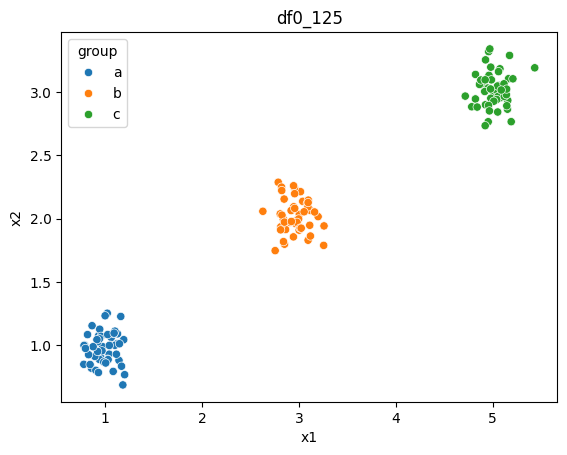

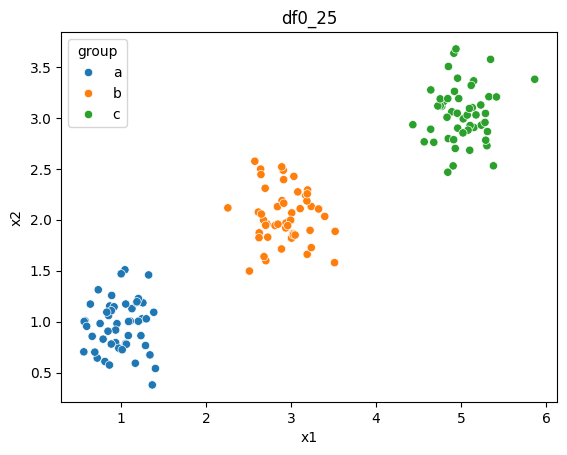

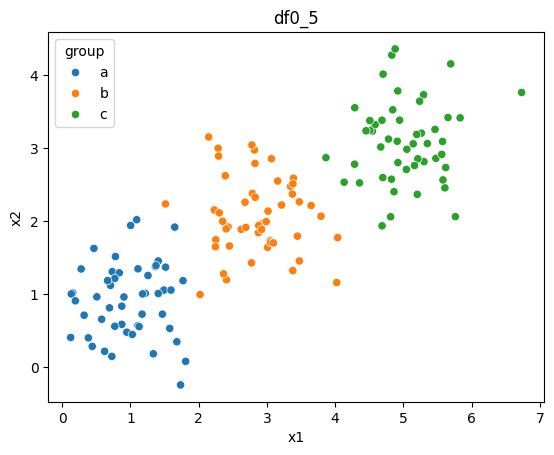

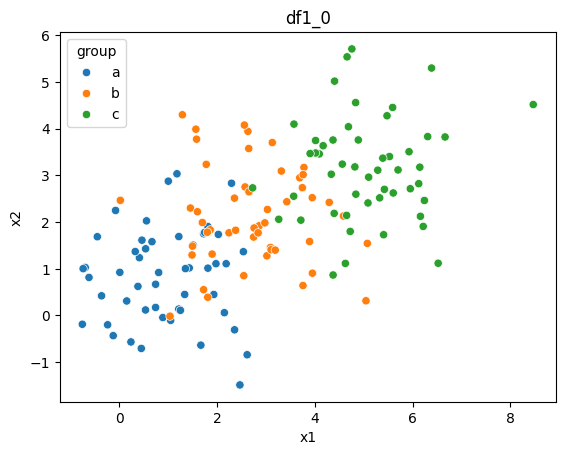

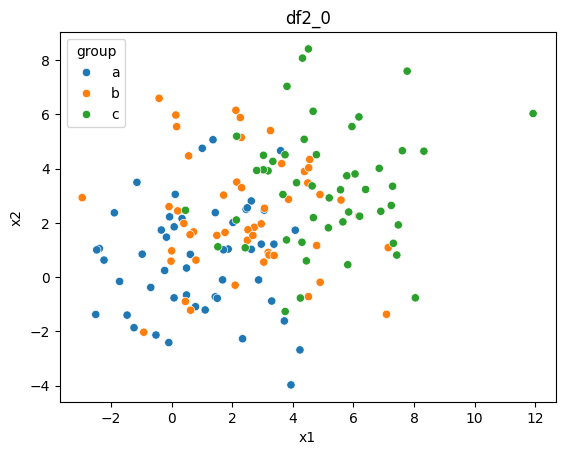

In [28]:
# make scatterplots of the (X1, X2) points by group for each of the datasets
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group')
plt.title('df0_125')
plt.show()

sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group')
plt.title('df0_25')
plt.show()

sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group')
plt.title('df0_5')
plt.show()

sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group')
plt.title('df1_0')
plt.show()

sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group')
plt.title('df2_0')
plt.show()

As the noise increases, the visual distinctness of the clusters decreases. When we reach a noise of 2, you are unable to tell the clusters apart from one another where with a noise of 0.125 there are three very distinct clusters.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

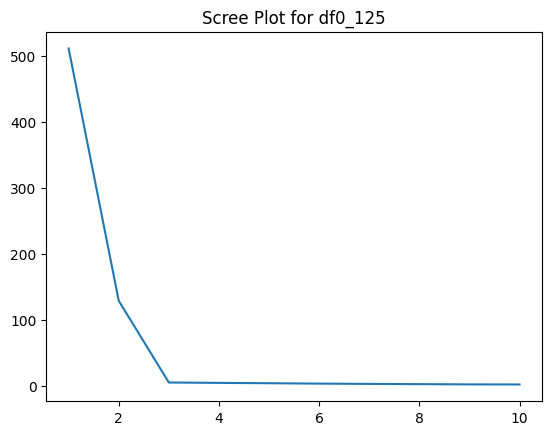

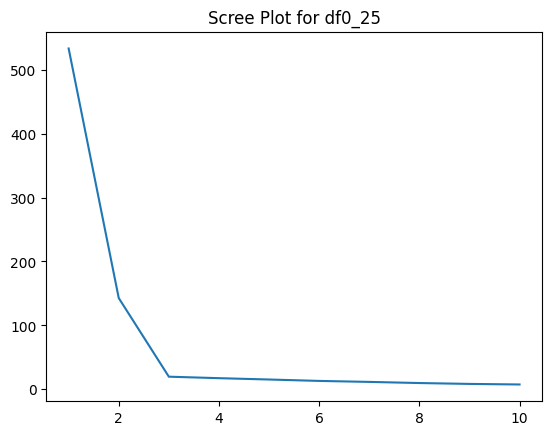

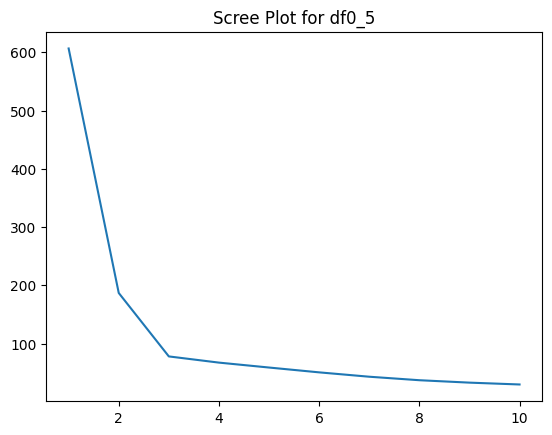

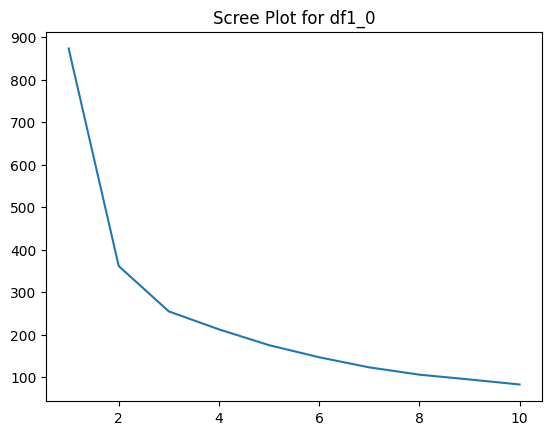

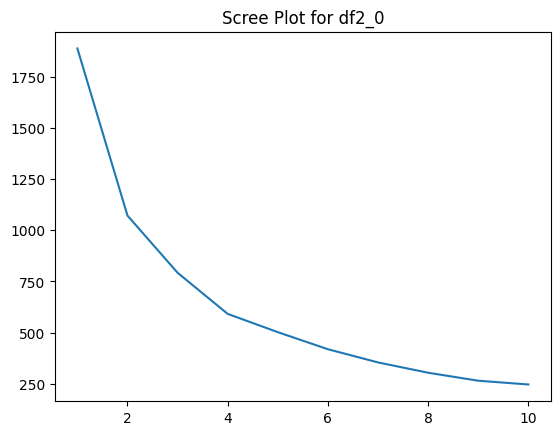

In [35]:
X_df0_125 = df0_125[['x1', 'x2']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df0_125)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df0_125')
plt.show()

# make a different plot for df0_25
X_df0_25 = df0_25[['x1', 'x2']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df0_25)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df0_25')
plt.show()

# make a different plot for df0_5
X_df0_5 = df0_5[['x1', 'x2']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df0_5)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df0_5')
plt.show()

# make a different plot for df_1
X_df1_0 = df1_0[['x1', 'x2']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df1_0)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df1_0')
plt.show()

# make a different plot for df2_0
X_df2_0 = df2_0[['x1', 'x2']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df2_0)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df2_0')
plt.show()

As the noise increases, the presence of a clear elbow decreases and the line on the plot becomes much more of a curve. It becomes increasingly more difficult to definitively select a k.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow method helps you to find a good k value by looking for the point on the scree plot where the SSE decreases more slowly. You want to have a balance between minimizing the within-cluster variance and having too many clusters. For datasets that have a low noise, like df0_125 and df0_5 the scree plots showed a clear elbow around k=3. As the noise increases, the elbow becomes less destinct because the clusters are becoming less well-defined with those higher noise levels.

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# import the google colab file package
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('airbnb_hw.csv')

Saving airbnb_hw.csv to airbnb_hw.csv


In [3]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [10]:
# clean the price variable
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)

In [12]:
# remove the NA values in bed
df['Beds'] = df['Beds'].fillna(0)

# clean the bed variable
df['Beds'] = df['Beds'].astype(int)

In [14]:
# clean the number of reviews variable
df['Number Of Reviews'] = df['Number Of Reviews'].fillna(0)
df['Number Of Reviews'] = df['Number Of Reviews'].astype(int)

In [15]:
# clean the review scores rating variable
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(0)
df['Review Scores Rating'] = df['Review Scores Rating'].astype(int)

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [16]:
# maxmin normalize the data dn remove any nan's
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']])
df_scaled

array([[0.01351351, 0.0625    , 0.        , 0.        ],
       [0.0027027 , 0.0625    , 0.00389105, 0.        ],
       [0.0018018 , 0.0625    , 0.00389105, 0.        ],
       ...,
       [0.00700701, 0.0625    , 0.        , 0.        ],
       [0.0025025 , 0.0625    , 0.        , 0.        ],
       [0.00700701, 0.0625    , 0.        , 0.        ]])

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [17]:
# cluster the data by beds, number of reviews, and review scores rating for k=6
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_scaled)

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

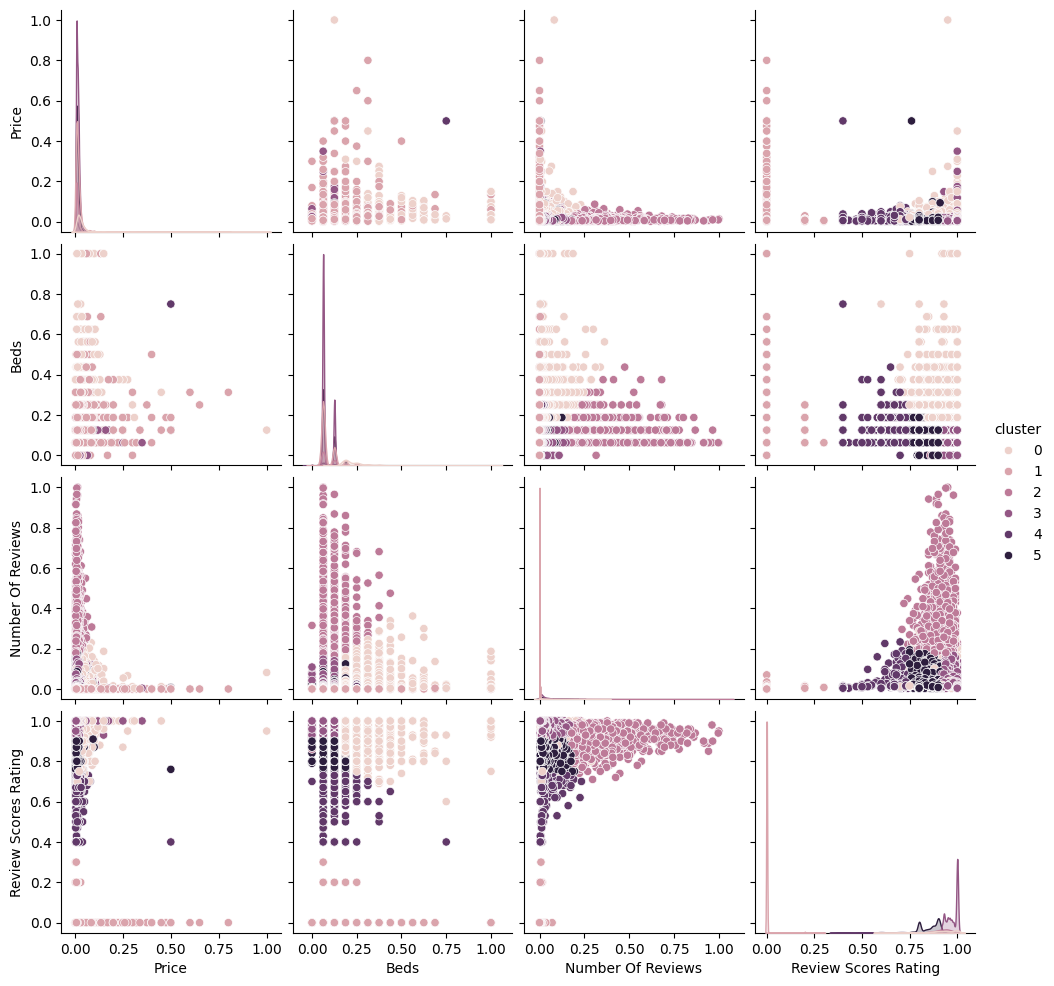

In [20]:
# use pairpolot to make a grid of scatterplots showing how the clustering is carried out in multiple dimensions
df_scaled = pd.DataFrame(df_scaled, columns=['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating'])
df_scaled['cluster'] = kmeans.labels_
sns.pairplot(df_scaled, hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?


In [23]:
# Use .groupby and .describe to compute the average price for each cluster
print(df_scaled.groupby('cluster')['Price'].describe())

# find which clusters have the highest rental prices
df_scaled.groupby('cluster')['Price'].mean()

           count      mean       std       min       25%       50%       75%  \
cluster                                                                        
0         2093.0  0.028301  0.033438  0.001602  0.014014  0.021522  0.034034   
1         8364.0  0.017673  0.028870  0.000000  0.007007  0.011512  0.019019   
2         2206.0  0.012644  0.007907  0.001702  0.007508  0.011011  0.016016   
3        11032.0  0.013707  0.009907  0.000000  0.007508  0.011812  0.017518   
4          733.0  0.012515  0.020374  0.001502  0.005506  0.009009  0.015015   
5         6050.0  0.012107  0.009964  0.001001  0.006507  0.010010  0.015791   

              max  
cluster            
0        1.000000  
1        0.799800  
2        0.086587  
3        0.349349  
4        0.499499  
5        0.499499  


,Price
cluster,
0,0.028301
1,0.017673
2,0.012644
3,0.013707
4,0.012515
5,0.012107


Clusters 0 and 1 have the highest rental prices.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

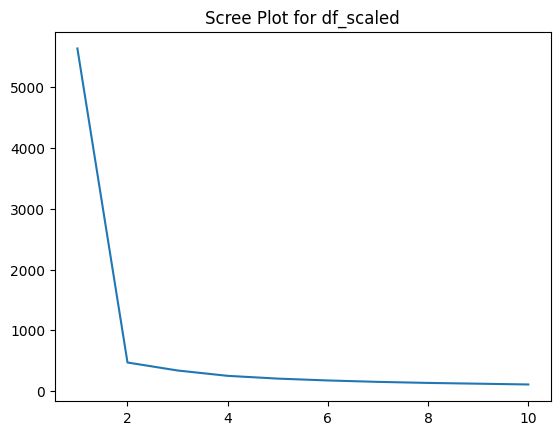

In [38]:
# use a scree plot to pick the number of clusters
X_df_scaled = df_scaled[['Beds', 'Number Of Reviews', 'Review Scores Rating']]
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)
  model = model.fit(X_df_scaled)
  SSE.append(model.inertia_)

scree_plot = sns.lineplot(x=np.arange(1, k_bar+1), y=SSE).set_title('Scree Plot for df_scaled')
plt.show()

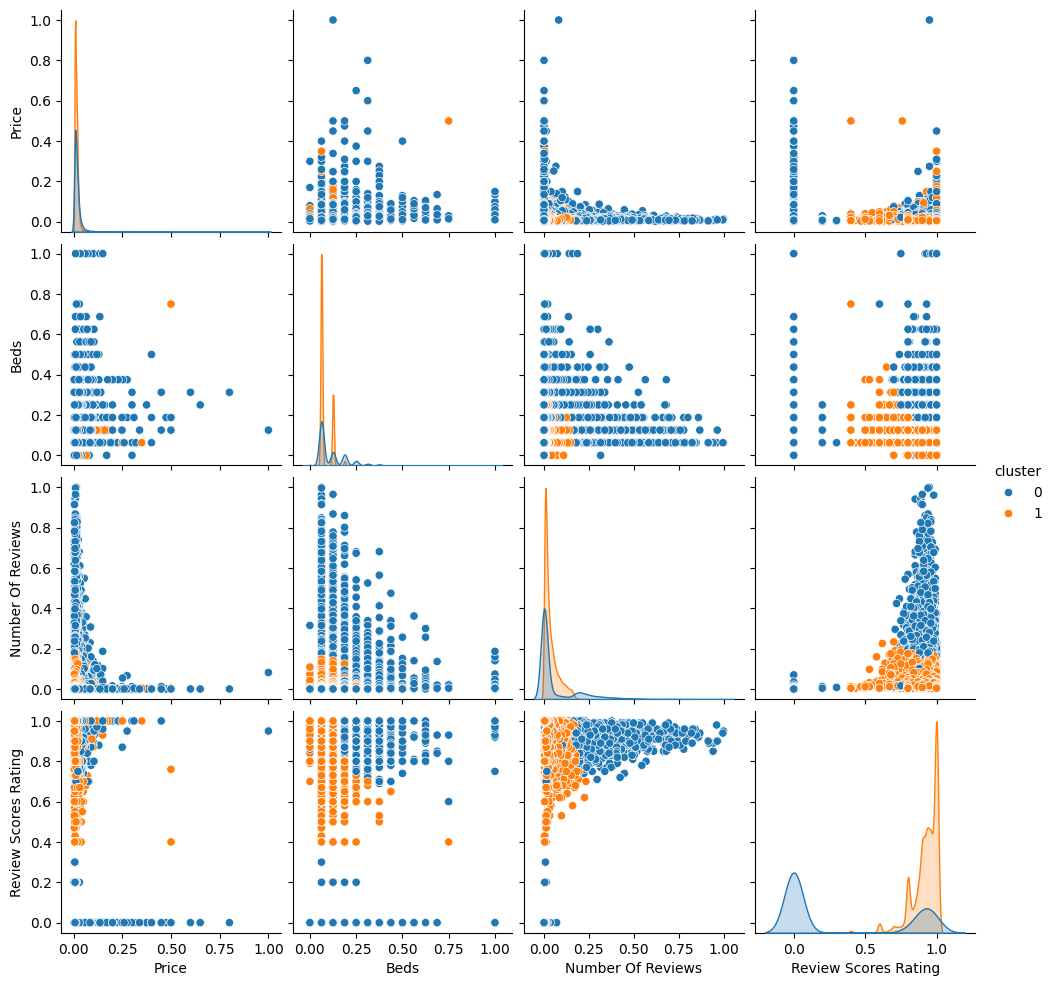

In [39]:
# repeat step 4 with a k of 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_
sns.pairplot(df_scaled, hue='cluster')


In [40]:
# repeat step 5 with a k of 2
# Use .groupby and .describe to compute the average price for each cluster
print(df_scaled.groupby('cluster')['Price'].describe())

# find which clusters have the highest rental prices
df_scaled.groupby('cluster')['Price'].mean()

           count      mean       std  min       25%       50%       75%  \
cluster                                                                   
0        12663.0  0.018553  0.027721  0.0  0.007508  0.012813  0.020521   
1        17815.0  0.013115  0.010589  0.0  0.007007  0.011111  0.016917   

              max  
cluster            
0        1.000000  
1        0.499499  


,Price
cluster,
0,0.018553
1,0.013115
